## Марковский процесс принятий решений

Обучение с подкреплением (RL) является направлением машинного обучения и изучает взаимодействие агента, которому необходимо максимизировать долговременный выигрыш в некоторой среде. Агенту не сообщается сведений о правильности действий, как в большинстве задач машинного обучения, вместо этого агент должен определить выгодные действия самостоятельно испробовав их. Испытание действий и отсроченная награда являются основными отличительными признаками RL.

<img src="rlIntro.png" caption="Взаимодействия агента со средой" style="width: 300px;" />

Основные составляющие модели RL:
\begin{itemize}
    \item $s_t$ -- состояние среды в момент времени $t$,
    \item $a_t$ -- действие, совершаемое агентом в момент времени $t$,
    \item $r_t$ -- вознаграждение, получаемое агентом при совершении действия $a_t$,
    \item $\pi$ -- стратегия, отвечает за выбор действия в конкретном состоянии.
\end{itemize}

В простейших моделях RL среда представляется в виде марковского процесса принятия решений (MDP), где функция перехода определяется как $P(s' |s,a)$, что означает вероятность оказаться в состоянии $s'$ при совершении действия $a$ в состоянии $s$. Вознаграждение теперь определяется как $r(s,a,s')$.

<img src="mdp.png" caption="Марковский процесс принятия решений" style="width: 400px;"/>

Будем пользоваться стандартными средами, реализованными в библиотеке OpenAI Gym (https://gym.openai.com).

/Users/efimovin/opt/anaconda3/envs/rl_36/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


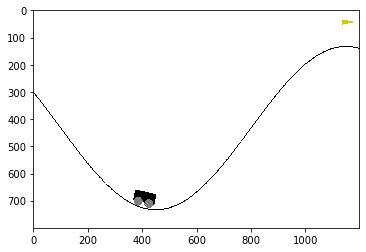

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym
# создаем окружение
env = gym.make("MountainCar-v0")
# рисуем картинку
plt.imshow(env.render('rgb_array'))
env.close()

### Интерфейс среды в OpenAI gym

Основные методы класса Env:
\begin{itemize}
    \item reset() - инициализация окружения, возвращает первое наблюдение
    \item render() - визуализация текущего состояния среды
    \item step($a$) - выполнить в среде действие a и получить: new observation - новое наблюдение после выполнения действия $a$; reward - вознаграждение за выполненное действие $a$; $is\_done$ - True, если процесс завершился, False иначе; $info$ - дополнительная информация
\end{itemize}

In [2]:
obs0 = env.reset()
print("изначальное состояние среды:", obs0)
# выполняем действие 2 
new_obs, reward, is_done, _ = env.step(2)
print("новое состояние:", new_obs, 
      "вознаграждение", reward)

изначальное состояние среды: [-0.50832134  0.        ]
новое состояние: [-0.50743588  0.00088546] вознаграждение -1.0


### Задание 1
Наша цель, чтобы тележка достигла флага. Модифицируйте код ниже для выполнения этого задания:

In [4]:
def act(s):
    actions = {'left': 0, 'stop': 1, 'right': 2}
    # в зависимости от полученного состояния среды 
    # выбираем действия так, чтобы тележка достигла флага
    # action = actions['left'] 
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    action = actions['left'] if s[1] < 0 else actions["right"]
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    return action

# создаем окружение, с ограничением на число шагов в 249
env = gym.wrappers.TimeLimit(
    gym.make("MountainCar-v0").unwrapped,
    max_episode_steps=250)
# проводим инициализацию и запоминаем начальное состояние
s = env.reset()
done = False
while not done:
    # выполняем действие, получаем s, r, done
    s, r, done, _ = env.step(act(s))
    # визуализируем окружение
    env.render()

env.close()
if s[0] > 0.47:
    print("Задание выполнено!")
else:
    raise NotImplementedError("""
    Исправьте функцию выбора действия!""")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Задание выполнено!


### Вероятностный подход к RL

Пусть наша стратегия - это вероятностное распределение:

$\pi(s,a) = P(a|s)$

Рассмотрим пример с задачей Taxi [Dietterich, 2000]. Для нее мы можем считать, что наша стратегия - это двумерный массив.

In [5]:
env = gym.make("Taxi-v2")
env.reset()
env.render()
n_states  = env.observation_space.n
n_actions = env.action_space.n  
print("состояний:", n_states, "\nдействий: ", n_actions)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

состояний: 500 
действий:  6


### Задание 2

Создадим "равномерную" стратегию в виде двумерного массива с равномерным распределением по действиям и сгенерируем игровую сессию с такой стратегией

In [6]:
policy = np.array(
    [[1./n_actions for _ in range(n_actions)] 
     for _ in range(n_states)])

In [7]:
def generate_session(policy,t_max=10**4):
    states,actions = [],[]
    total_reward = 0.
    s = env.reset()
    for t in range(t_max):
        # Нужно выбрать действие с вероятностью, 
        # указанной в стратегии
        # a = 
        #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
        
         
        a = np.random.choice(n_actions, p=policy[s])
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
        new_s,r,done,info = env.step(a)
        # запоминаем состояния, действия и вознаграждение
        states.append(s)
        actions.append(a)
        total_reward += r
        
        s = new_s
        if done:
            break
    return states,actions,total_reward

In [8]:
s,a,r = generate_session(policy)

Наша задача - выделить лучшие действия и состояния, т.е. такие, при которых было лучшее вознаграждение:

In [9]:
def select_elites(states_batch, actions_batch, 
                  rewards_batch, percentile=50):
    """
    Выбирает состояния и действия с заданным процентилем 
    :param states_batch: states_batch[sess_i][t]
    :param actions_batch: actions_batch[sess_i][t]
    :param rewards_batch: rewards_batch[sess_i]
    
    :returns: elite_states, elite_actions - одномерные 
    списки состояния и действия, выбранных сессий
    """
    # нужно найти порог вознаграждения по процентилю
    # reward_threshold =
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    reward_threshold = \
        np.percentile(rewards_batch, percentile)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    
    # в соответствии с найденным порогом - отобрать 
    # подходящие состояния и действия
    # elite_states = 
    # elite_actions = 
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    elite_states  = [session for session_i, session 
         in enumerate(states_batch) 
         if rewards_batch[session_i] >= reward_threshold]
    elite_states = [state for session in elite_states 
                    for state in session]
    
    elite_actions = [session for session_i, session 
         in enumerate(actions_batch) 
         if rewards_batch[session_i] >= reward_threshold]
    elite_actions = [action for session in elite_actions 
                     for action in session]
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    
    return elite_states,elite_actions

In [10]:
states_batch = [
    [1, 2, 3],  # game1
    [4, 2, 0, 2],  # game2
    [3, 1]  # game3
]

actions_batch = [
    [0, 2, 4],  # игра 1
    [3, 2, 0, 1],  # игра 2
    [3, 3]  # игра 3
]
rewards_batch = [
    3,  # игра 1
    4,  # игра 2
    5,  # игра 3
]

test_result_0 = select_elites(states_batch, actions_batch,
                              rewards_batch, percentile=0)
test_result_40 = select_elites(states_batch,
                               actions_batch,
                               rewards_batch,
                               percentile=30)
test_result_90 = select_elites(states_batch,
                               actions_batch,
                               rewards_batch,
                               percentile=90)
test_result_100 = select_elites(states_batch,
                                actions_batch,
                                rewards_batch,
                                percentile=100)

assert np.all(
    test_result_0[0] == [1, 2, 3, 4, 2, 0, 2, 3, 1]) \
       and np.all(
    test_result_0[1] == [0, 2, 4, 3, 2, 0, 1, 3, 3]), \
    "Для процентиля 0 необходимо выбрать все состояния " \
    "и действия в хронологическом порядке"

assert np.all(test_result_40[0] == [4, 2, 0, 2, 3, 1])\
   and np.all(test_result_40[1] == [3, 2, 0, 1, 3, 3]), \
    "Для процентиля 30 необходимо выбрать " \
    "состояния/действия из [3:]"
assert np.all(test_result_90[0] == [3, 1]) and \
       np.all(test_result_90[1] == [3, 3]), \
    "Для процентиля 90 необходимо выбрать состояния " \
    "действия одной игры"
assert np.all(test_result_100[0] == [3, 1]) and \
       np.all(test_result_100[1] == [3, 3]), \
    "Проверьте использование знаков: >=,  >. " \
    "Также проверьте расчет процентиля"
print("Тесты пройдены!")


Тесты пройдены!


Теперь мы хотим написать обновляющуюся стратегию

In [11]:
def update_policy(elite_states,elite_actions):
    """
    обновление стратегии
    policy[s_i,a_i] ~ #[вхождения  si/ai 
    в лучшие states/actions]
    :param elite_states:  список состояний
    :param elite_actions: список действий
    """
    new_policy = np.zeros([n_states,n_actions])
    for state in range(n_states):
        # обновялем стратегию - нормируем новые частоты 
        # действий и не забываем про не встречающиеся 
        # состояния
        # new_policy[state, a] = 
        #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
        
         
        occur = 0
        for pos, s in enumerate(elite_states):
            if s == state:
                new_policy[state, elite_actions[pos]] += 1
                occur += 1
        if occur > 0:
            for a in range(n_actions):
                new_policy[state, a] /= occur
        else:
            for a in range(n_actions):
                new_policy[state, a] = 1./n_actions
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
    return new_policy

In [12]:
elite_states, elite_actions = (
    [1, 2, 3, 4, 2, 0, 2, 3, 1],
    [0, 2, 4, 3, 2, 0, 1, 3, 3])

new_policy = update_policy(elite_states, elite_actions)

assert np.isfinite(
    new_policy).all(), "Стратегия не должна содержать " \
                       "NaNs или +-inf. Проверьте " \
                       "деление на ноль. "
assert np.all(
    new_policy >= 0), "Стратегия не должна содержать " \
                      "отрицательных вероятностей "
assert np.allclose(new_policy.sum(axis=-1),
                   1), "Суммарная\ вероятность действий"\
                       "для состояния должна равняться 1"
reference_answer = np.array([
    [1., 0., 0., 0., 0.],
    [0.5, 0., 0., 0.5, 0.],
    [0., 0.33333333, 0.66666667, 0., 0.],
    [0., 0., 0., 0.5, 0.5]])
assert np.allclose(new_policy[:4, :5], reference_answer)
print("Тесты пройдены!")


Тесты пройдены!


Визуализириуем наш процесс обучения и также будем измерять распределение получаемых за сессию вознаграждений 

In [13]:
from IPython.display import clear_output


def show_progress(rewards_batch, log, reward_range=None):
    """
    Удобная функция, которая отображает прогресс обучения.
    Здесь нет крутой математики, только графики.
    """

    if reward_range is None:
        reward_range = [-990, +10]
    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([mean_reward, threshold])

    clear_output(True)
    print("mean reward = %.3f, threshold=%.3f" % (
        mean_reward,
        threshold))
    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1],
             label='Reward thresholds')
    plt.legend(loc=4)
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.hist(rewards_batch, range=reward_range)
    plt.vlines([np.percentile(rewards_batch, percentile)],
               [0], [100], label="percentile",
               color='red')
    plt.legend(loc=1)
    plt.grid()

    plt.show()

mean reward = -74.920, threshold=7.000


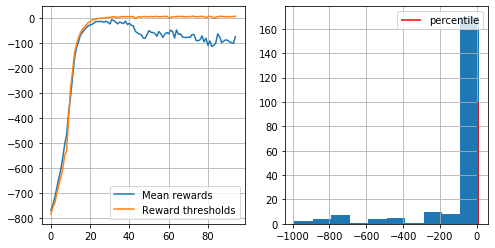

KeyboardInterrupt: 

In [14]:
policy = np.ones([n_states,n_actions])/n_actions 
n_sessions = 250  # количество сессий для сэмплирования
percentile = 50  # процентиль 
learning_rate = 0.5  

log = []

for i in range(100):
    # генерируем n_sessions сессий
    # sessions = []
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    sessions = [generate_session(policy) for _ in range(n_sessions)]
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    states_batch,actions_batch,rewards_batch = \
        zip(*sessions)
    # отбираем лучшие действия и состояния ###
    # elite_states, elite_actions = 
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    elite_states, elite_actions = select_elites(
    states_batch,actions_batch,rewards_batch, percentile)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    
    # обновляем стратегию
    # new_policy =
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    new_policy = update_policy(elite_states, elite_actions)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    policy = learning_rate*new_policy + \
                     (1-learning_rate)*policy
    # визуализация обучения
    show_progress(rewards_batch,log)

### Задание 3

Попробуем заменить метод обновления вероятностей на нейронную сеть. Будем тестировать нашего нового агента на известной задаче перевернутого маятника с непрерывным множеством действий.

/Users/efimovin/opt/anaconda3/envs/rl_36/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


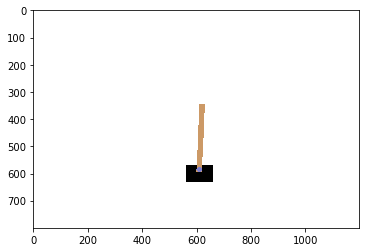

In [15]:
env = gym.make("CartPole-v0").env  
env.reset()
n_actions = env.action_space.n

plt.imshow(env.render("rgb_array"))
env.close()

In [18]:
# создаем агента
from sklearn.neural_network import MLPClassifier
# создаем полносвязную сеть с двумя слоями по 20 нейронов, 
# активация tanh
# agent = 
#~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~

 
agent = MLPClassifier(hidden_layer_sizes=(20,20),
                      activation='tanh',
                      warm_start=True, 
                      #keep progress between .fit(.) calls
                      max_iter=1 
                      #make only 1 iteration on each .fit(.)
                     )

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

agent.fit([env.reset()]*n_actions, range(n_actions))

/Users/efimovin/opt/anaconda3/envs/rl_36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)

In [19]:
env.reset()

array([ 0.02345032, -0.01231384, -0.01672856,  0.03222096])

In [20]:
def generate_session(t_max=1000):
    
    states,actions = [],[]
    total_reward = 0
    
    s = env.reset()
    
    for t in range(t_max):
        
        # предсказываем вероятности действий по сети и 
        # выбираем одно действие
        # probs = 
        # a = 
        #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
        
         
        probs = agent.predict_proba([s])[0] 
        a = np.random.choice(n_actions, p=probs)
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
        new_s,r,done,info = env.step(a)
        
        #record sessions like you did before
        states.append(s)
        actions.append(a)
        total_reward+=r
        
        s = new_s
        if done: break
    return states,actions,total_reward

mean reward = 204.480, threshold=233.900


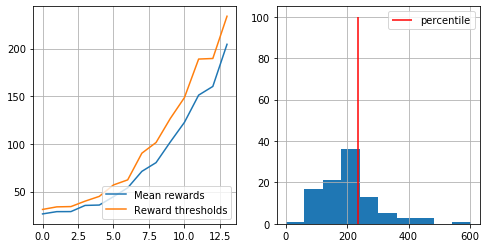

Принято!


In [21]:
n_sessions = 100
percentile = 70
log = []

for i in range(100):
    # генерируем n_sessions сессий
    # sessions = [<gen a list>]
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    sessions = [generate_session() for _ in range(n_sessions)]
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    states_batch,actions_batch,rewards_batch =\
    map(np.array,zip(*sessions))
    
    # отбираем лучшие действия и состояния
    # elite_states, elite_actions =
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    elite_states, elite_actions = select_elites(states_batch,actions_batch,rewards_batch, percentile)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    # обновляем стратегию для предсказания
    # elite_actions(y) из elite_states(X)
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    agent.fit(elite_states, elite_actions)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    r_range =[0,np.max(rewards_batch)]
    show_progress(rewards_batch, log, r_range )
    
    if np.mean(rewards_batch) > 190:
        print("Принято!")
        break

In [22]:
# монитор для сессий
import gym.wrappers
env = gym.wrappers.Monitor(gym.make("CartPole-v0"),
                           directory="videos",force=True)
sessions = [generate_session() for _ in range(100)]
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/Users/efimovin/opt/anaconda3/envs/rl_36/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


DependencyNotInstalled: Found neither the ffmpeg nor avconv executables. On OS X, you can install ffmpeg via `brew install ffmpeg`. On most Ubuntu variants, `sudo apt-get install ffmpeg` should do it. On Ubuntu 14.04, however, you'll need to install avconv with `sudo apt-get install libav-tools`.

In [23]:
env.close()

In [24]:
# можем посмотреть видео
from IPython.display import HTML
import os

video_names = list(filter(lambda s:s.endswith(".mp4"),
                          os.listdir("./videos/")))

HTML("""
<video width="640" height="480" controls>
  <source src="{}" type="video/mp4">
</video>
""".format("./videos/"+video_names[-1]))
# вместо последнего можно выбрать любой индекс

IndexError: list index out of range